# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Dinesh Gurumoorthy
### Github link: https://github.com/dineshgurum8/Article-summarizer 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Packages import

In [5]:
import json  
import pathlib  
import pickle  
from collections import Counter
import numpy as np  

import requests  
from bs4 import BeautifulSoup  
import matplotlib.pyplot as plt  
import spacy  
from spacy.tokens import Doc  
from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print("All prereqs installed.")


Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.8.3
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
en_core_web_sm          3.8.0
executing               2.2.0
fonttools               4.59.0
html5lib                1.1
idna                    3.10
ipykernel               6.30.0
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver             


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
## Question 1

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [10]:
import requests
from bs4 import BeautifulSoup
import pickle

url = "https://aidenblakemagee.medium.com/ais-impact-on-human-writing-resource-or-replacement-060d261b012f"
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    article_tag = soup.find('article')
    if article_tag:
        # Collect all paragraph texts inside the article tag
        paragraphs = article_tag.find_all('p')
        article_text = "\n\n".join(p.get_text() for p in paragraphs)
        
        print(article_text[:500])  # Print first 500 characters
        
        # Save to pickle
        with open('article.pkl', 'wb') as f:
            pickle.dump(article_text, f)
    else:
        print("No <article> tag found on the page.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")



--

1

Listen

Share

“While AI can be a powerful tool for aiding and augmenting the writing process, it is not a direct replacement for the unique qualities that human writers bring to the table.”

- OpenAi’s Artificial intelligence chatbot, ChatGPT

During my first semester of college, a close friend of mine asked me if I felt threatened by the growing popularity of AI writing since I am a writing major. My immediate response was “no.” I responded this way for two reasons. First, I was too pri


### Question 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [11]:
# Load the article from the .pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, parser)
article_text = soup.get_text(separator='\n')

# Print the text
print(article_text)


--

1

Listen

Share

“While AI can be a powerful tool for aiding and augmenting the writing process, it is not a direct replacement for the unique qualities that human writers bring to the table.”

- OpenAi’s Artificial intelligence chatbot, ChatGPT

During my first semester of college, a close friend of mine asked me if I felt threatened by the growing popularity of AI writing since I am a writing major. My immediate response was “no.” I responded this way for two reasons. First, I was too prideful to even consider that AI could replace humans in the field of writing. Second, I did not know what AI was capable of. Now, as AI writing programs such as Jasper, Copy.ai, Chat GPT, and Sudowrite have grown in popularity, I do feel threatened and worried about the increasing usage of AI writing and its potential impact on human writers.

Valued at $196 billion in 2023 and estimated to be worth over $1.8 trillion by 2030, the artificial intelligence industry is growing at a rapid pace. 77% o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [12]:
from spacytextblob.spacytextblob import SpacyTextBlob

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)


nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(article_text)

# Getting rid of tokens we don't care about & converting to lowercase
interesting_tokens = [token.text.lower() for token in doc if we_care_about(token)]

# Determine the 5 most frequent tokens
token_freq = Counter(map(str, interesting_tokens))
print(token_freq.most_common(5))

[('ai', 58), ('writing', 21), ('writers', 19), ('intelligence', 16), ('human', 13)]


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [13]:

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]

# Determine the 5 most frequent lemmas
lemma_freq = Counter(map(str, interesting_lemmas))
print(lemma_freq.most_common(5))

[('ai', 58), ('writer', 22), ('writing', 18), ('human', 18), ('intelligence', 16)]


### Question 5

### 5.Define the following methods:
        score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
        
        score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence

You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [14]:
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Score a sentence based on the frequency of interesting tokens.
    Args:
        sentence (spacy.tokens.Span): The sentence to score.
        interesting_tokens (set): A set of tokens considered interesting.
    
    Returns the number of times that any of the interesting tokens appear in the sentence divided by the number of words in the sentence.
    """
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if we_care_about(token)]
    if not words:
        return 0
    interesting_words = sum(1 for word in words if word in interesting_tokens)
    return interesting_words / len(words)
    

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Score a sentence based on the frequency of interesting lemmas.
    Args:
        sentence (spacy.tokens.Span): The sentence to score.
        interesting_lemmas (set): A set of lemmas considered interesting.
    
    Returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence.
    """
    doc = nlp(sentence)
    lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
    if not lemmas:
        return 0
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas)
    
doc = nlp(article_text)
# Test score_sentency_by_token with the first sentence
# First line is blank, so we will skip it
i = 0
for sent in doc.sents:
    if i == 1:
        first_sentence = sent
        break
    i += 1

print(f"First sentence: {first_sentence.text}")
print(f"Score by token: {score_sentence_by_token(first_sentence.text, [t[0] for t in token_freq.most_common(5)])}")

# Test score_sentency_by_lemma with the first sentence
print(f"Score by lemma: {score_sentence_by_lemma(first_sentence.text, [t[0] for t in lemma_freq.most_common(5)])}")


First sentence: My immediate response was “no.”
Score by token: 0.0
Score by lemma: 0.0


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

['ai', 'writing', 'writers', 'intelligence', 'human']


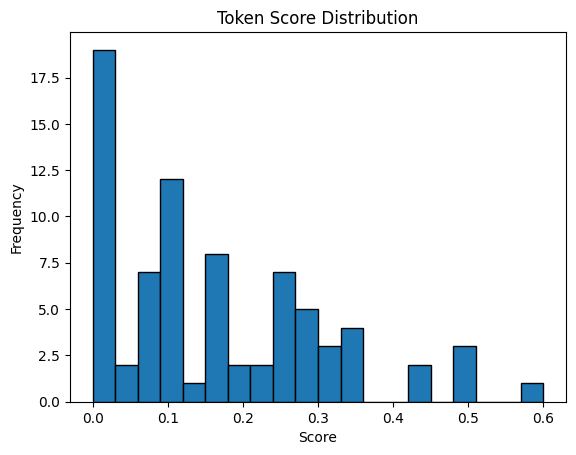

In [15]:

used_tokens = [t[0] for t in token_freq.most_common(5)]
print(used_tokens)

scores = []
for sent in doc.sents:
    scores.append(score_sentence_by_token(sent.text, used_tokens))

# Plotting the scores on a histogram

plt.hist(scores, bins=20, edgecolor='black')
plt.title('Token Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?